# Image Basics
This set of notes will go over the bare basics of images and how they can be inspected. The first section will use primitive arrays only to show how a basic image is constructed and how the data that makes up an image is formatted. The opencv syntax will be located at the bottom of these notes. Feel free to modify any of the code shown in these notebooks if you would like to experiment.

### Color Channels and Color Spaces
#### Red Green Blue (RGB)
An image is made up of pixels, which contains a set of values based on the colorspace used. For red, green, blue (RGB) formatting, each pixel contains three values ranging between [0, 255] that describe the color value for each channel. For example, a white pixel will be the tuple (255, 255, 255), and basic red will be (255, 0, 0). An example of how each color channel can be combined to create other colors is shown below.

<!-- ![visual representation of a pixel](https://www.codeproject.com/KB/tips/1112774/rgbPixelEx.PNG) -->
<center><img src='https://www.codeproject.com/KB/tips/1112774/rgbPixelEx.PNG'></center>

***
An image is essentially a 2D dimensional array of pixels, which can easily be represented as a 3D array as shown below.
***
![visual of pixel array](https://media.geeksforgeeks.org/wp-content/uploads/Pixel.jpg)

Creating an image can be easily done using Python as follows:

In [1]:
img = [[[0 for k in range(3)] for j in range(10)] for i in range(10)]

This creates an array of size 10 x 10 x 3, with each pixel being black (0, 0, 0). The image can be shown using:

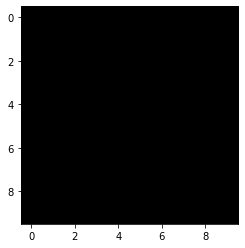

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

A single pixel can be easily accessed using indexing:

In [22]:
img[1][4]

[0, 0, 0]

#### Hue Saturation Value (HSV)
This is a cylindrical color model that is often considered easier to understand compared to RGB. In many computer vision applications, it is often much better to use HSV compared to RGB because HSV can deal much better with noise in images such as shadows that may mislead applications using the RBG colorspace to analyze the images. HSV also separates the image intensity and color information.

Reference for full explanation and visual of HSV: <a href="https://programmingdesignsystems.com/color/color-models-and-color-spaces/index.html#:~:text=HSV%20is%20a%20cylindrical%20color,easier%20for%20humans%20to%20understand.&text=Hue%20specifies%20the%20angle%20of,the%20amount%20of%20color%20used." target="_blank">HSV Colorspace</a>

***
### Editing the Image
***
Editing and/or manipulating an image is very straightforward and involves accessing and changing the color values for individual pixels.

Individual pixels can be accessed by using the row and column positions. If I wanted the top left corner pixel of my black square image, I could get the RGB values at that pixel by saying:
```python
img[row][column]
```
This will return [0, 0, 0], meaning that the pixel at the top left corner is a black pixel.

To change the color values of a pixel, the individual color channels must be accessed. the channels on an RGB image are indexed as:
* 0 = red
* 1 = green
* 2 = blue

Hence, RGB

If I wanted to change the pixel at the second row, third column to a shade of gray, I could do so by saying:
```python
img[row][column][0] = 127 #Red
img[row][column][1] = 127 #Green
img[row][column][2] = 127 #Blue
```

I can do this for as many pixels as I want. For example, if I wanted to draw a red square on my black image, I could do so very easily by editing the pixel values at the desired indices:

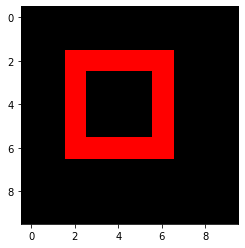

In [7]:
# code to draw simple square using array indexing
for i in range(2,7):
    img[i][2][0] = 255
    img[i][6][0] = 255
    img[2][i][0] = 255
    img[6][i][0] = 255
plt.imshow(img)

***
### Grayscaling
***
Many applications of computer vision require the image to be grayscaled before any other operations are performed on the image. Grayscaling an image involves converting an image where each pixel may contain multiple values like in RGB to only containing a single value representing the intensity of light.

#### Method 1 - Averaging
A simple way to convert an image into a grayscale image is to take the average of all of the values stored in each pixel and make each channel for that pixel contain the computed average. Below is a simple method that achieves performs this operation on an image.

In [9]:
def grayscale_avg(img):
    for row in range(len(img)):
        for col in range(len(img[row])):
            pixl_avg = (int)((img[row][col][0] + img[row][col][1] + img[row][col][2])/3)           
            img[row][col][0] = pixl_avg
            img[row][col][1] = pixl_avg
            img[row][col][2] = pixl_avg
    return img

I can now create a sample test image to check this method:

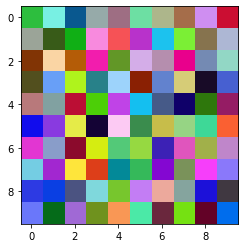

In [12]:
import random
gray_img_avg = [[[random.randint(0, 255) for k in range(3)] for j in range(10)] for i in range(10)]
plt.imshow(gray_img_avg)

Upon applying the grayscale_avg method, the image now looks as follows:

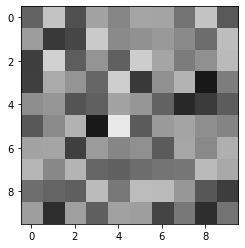

In [13]:
gray_img_avg = grayscale_avg(gray_img_avg)
plt.imshow(gray_img_avg)

#### Method 2 - Luminance
Another way to convert an image into a grayscale image is to use the luminance equation which is:
* Luminance = 0.2126R + 0.7152G + 0.0722B

Luminance is essentially the brightness, or intensity of the color of each pixel. Brighter colors will have higher luminance.

In [17]:
def gray_luminance(img):
    for row in range(len(img)):
        for col in range(len(img[row])):
            luminance = (int)((img[row][col][0]*0.2126) + 
                              (img[row][col][1]*0.7152) + 
                              (img[row][col][2]*0.0722))          
            img[row][col][0] = luminance
            img[row][col][1] = luminance
            img[row][col][2] = luminance

Creating another sample test image:

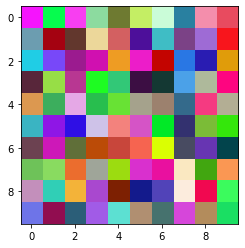

In [20]:
gray_img_lumin = [[[random.randint(0, 255) for k in range(3)] for j in range(10)] for i in range(10)]
plt.imshow(gray_img_lumin)

And converting it to a grayscale one using luminance:

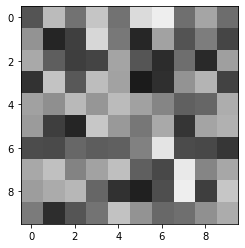

In [21]:
gray_luminance(gray_img_lumin)
plt.imshow(gray_img_lumin)

***
### Opencv Basics
***
Opencv makes the all of the code and steps described above much simpler and straigtforward.

Loading in an image:

In [27]:
import cv2
dog_img = cv2.imread('../DATA/00-puppy.jpg')

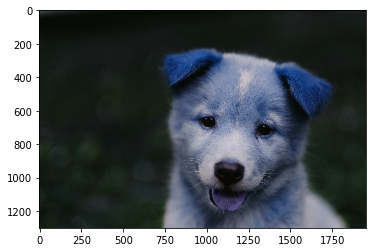

In [28]:
plt.imshow(dog_img)

The only problem here is that opencv uses BGR as its default colorspace when reading in images. To convert this image into RGB format, the cvtColor() method can be used to convert to other colorspaces:

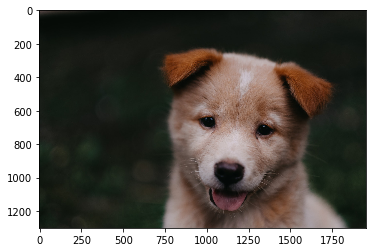

In [29]:
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
plt.imshow(dog_img)

To convert the image to grayscale, the same method can be used:

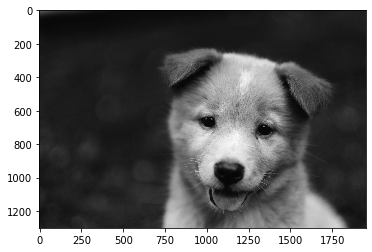

In [31]:
gray_dog = cv2.cvtColor(dog_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_dog, cmap='gray')

In [32]:
#End